In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('nutrientcomposition_new.csv')

In [3]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [4]:
df.iloc[:,1:5].describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [5]:
data = df.iloc[:, 1:5] 
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(data, method = 'ward')

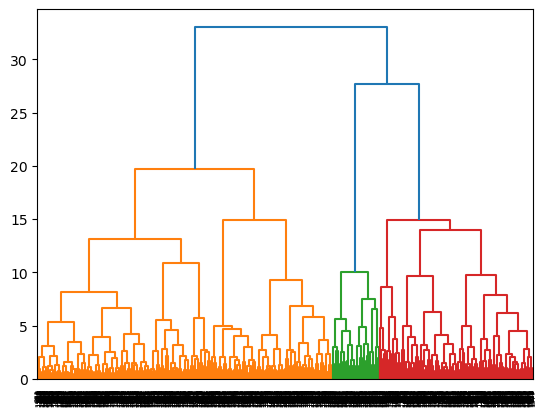

In [7]:
dend = dendrogram(wardlink)

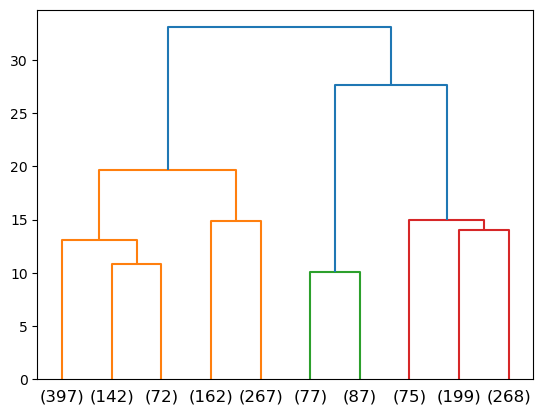

In [8]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [9]:
from scipy.cluster.hierarchy import fcluster

In [10]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [11]:
# Method 2

clusters = fcluster(wardlink, 23, criterion='distance')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [12]:
df['clusters'] = clusters

In [13]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1
